### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.) Loading the dataset into our environment

In [2]:
df = pd.read_excel("iris.xls")
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


We have 5 features (inc. the target) and 150 samples

In [3]:
df.Classification.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Classification, dtype: int64

### Desribing the features:

In the Dataset given to us, we're provided with the following information :

> * We've a total of 150 data samples of Iris flower with us.

> * There are 3 different species of Iris in our sample. Each species has 50 samples beneath them. The 3 species are :
> > * `Iris-virginica`,
> > * `Iris-setosa`,
> > * `Iris-versicolor`.

> * The following features of various iris species have been recorded in our dataset.
> > * **Sepal length (SL)** - This represents the Length of Iris Sepal,
> > * **Sepal width (SW)** - Represents the Width of Iris Sepal, 
> > * **Petal length (PL)** - Represents the Length of Iris Petal
> > * **Petal width (PW)** - Represents the Width of Iris Petal

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2.) Performing preprocessing

**Step 1** : `Checking for missing Values and duplicates`

In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [7]:
df.Classification.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Classification, dtype: int64

In [8]:
df[df.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


* There are 3 duplicates in our dataset but removing them might lead to imbalance in our dataset, as we see that our dataset is balanced (i.e. each of the species have equal no of samples).

* There are Missing Values present in ouir Dataset. 

> * The Missing values are in `Sepal length` (SL),`Sepal width` (SW), `Petal length` (PL) features.

In [9]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Step 2** : `Filling the missing Values with the Median`

The skewness is :  0.3068227108046868


C:\Users\101me\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


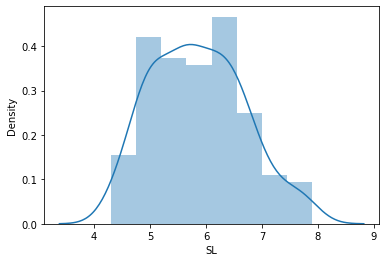

In [10]:
sns.distplot(df["SL"])
print("The skewness is : ", df.SL.skew())

In [11]:
# Filling the missing value with the median

df["SL"] = df["SL"].fillna(df["SL"].median())

C:\Users\101me\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skewness is :  0.37781843718771746


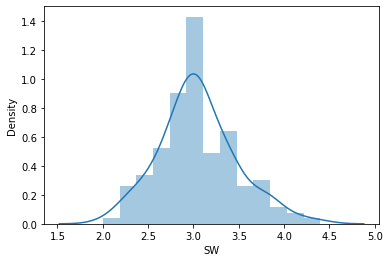

In [12]:
sns.distplot(df["SW"])
print("The skewness is : ", df.SW.skew())

In [13]:
df["SW"] = df["SW"].fillna(df["SW"].median())

C:\Users\101me\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skewness is :  -0.2689053923783847


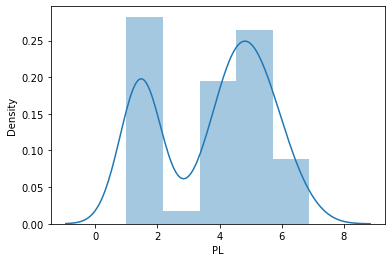

In [14]:
sns.distplot(df.PL)
print("The skewness is : ", df.PL.skew())

In [15]:
df["PL"] = df["PL"].fillna(df["PL"].median())

In [16]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Thus, we've successfully filled in the Missing values in the dataset.

##### 

**Step 2** : `Checking for Outliers`

In [17]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

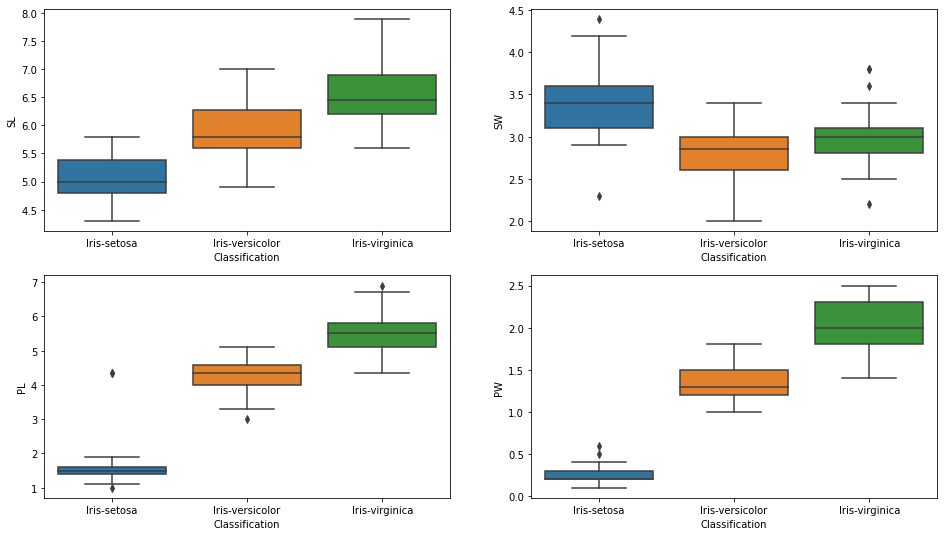

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="SL", x= "Classification", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="SW", x= "Classification", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="PL", x= "Classification", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="PW", x= "Classification", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

In [19]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


> #### We can leave the `Outliers` as such since they're in acceptable range and their removal in such a small dataset may result in imbalance.

In [20]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [21]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


# 3.) Creating various Models for predicting the Species of flower

In [22]:
x = df.drop(["Classification"],axis=1)
y = df["Classification"]

<AxesSubplot:>

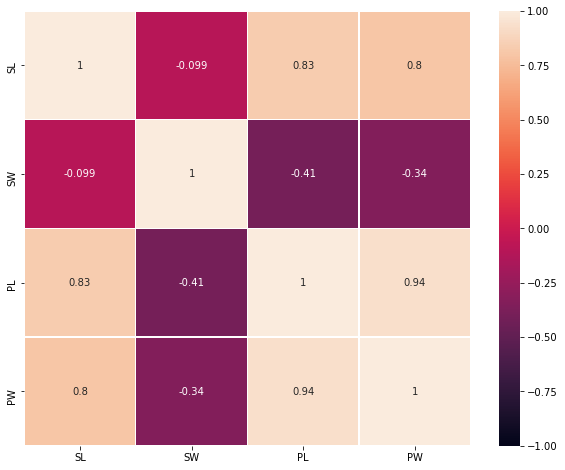

In [23]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, linewidths=0.2, annot=True,vmin=-1,vmax=1)

> The Sepal length has a high positive correlatiion with the Petal features and the vice-versa.

> Sepal Width has less or negligible co-relation with other features. 

> Here we can also note that compared to the Sepal features, the Petal features have high correlatiom with each other.

#### `Importing the libraries for splitting the dataset into training and testing data.`

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [26]:
x_train.shape

(112, 4)

In [27]:
x_test.shape

(38, 4)

* We have alloted **75%** of our data for traingg the model and the remaining **25%** for Testing purpose.

### 1) Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score

In [29]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

y_train_pred = model.predict(x_train) #To checking training data prediction & accuracy in future

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred))
print("\nThe accuracy score of LR model is : ", accuracy_score(y_test,predict))
print("The F1 score of LR model is : ", f1_score(y_test,predict,average="micro"))
print("\nThe accuracy score of LR model is : \n", confusion_matrix(y_test,predict))

Training Accuracy is :  0.9464285714285714

The accuracy score of LR model is :  0.9736842105263158
The F1 score of LR model is :  0.9736842105263158

The accuracy score of LR model is : 
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


C:\Users\101me\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2) KNN Model

In [30]:
from sklearn.neighbors import KNeighborsClassifier

[0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


Text(0, 0.5, 'accuracy')

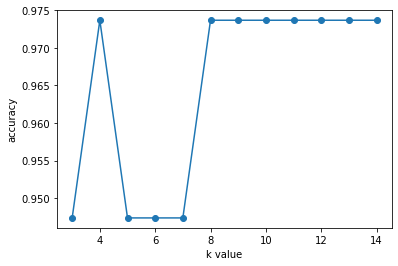

In [31]:
acc_val = []
neighbors = np.arange(3,15)


for k in neighbors:
    #creating an instance for knn
    knn_classifer = KNeighborsClassifier(n_neighbors=k,metric = "minkowski")
    knn_classifer.fit(x_train,y_train)
    predict1 = knn_classifer.predict(x_test)
    acc = accuracy_score(y_test,predict1)
    acc_val.append(acc)
    
print(acc_val)
plt.plot(neighbors,acc_val,"o-") # o- will plot with a line joining all the dots
plt.xlabel("k value")
plt.ylabel("accuracy")

In [32]:
classifer = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
classifer.fit(x_train,y_train)
predict1 = classifer.predict(x_test)

y_train_pred1 = classifer.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred1))
print("\nThe accuracy score of KNN model is : ", accuracy_score(y_test,predict1))
print("The F1 score of KNN model is : ", f1_score(y_test,predict1,average="micro"))
print("\nThe confusion matrix of KNN model is : \n", confusion_matrix(y_test,predict1))

Training Accuracy is :  0.9553571428571429

The accuracy score of KNN model is :  0.9736842105263158
The F1 score of KNN model is :  0.9736842105263158

The confusion matrix of KNN model is : 
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


### 3) SVM Model

In [33]:
from sklearn.svm import SVC

#### RBF SVM Model

In [34]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
predict2 = svm_radial.predict(x_test)

y_train_pred2 = svm_radial.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2))
print("\nThe accuracy score of Radial SVM model is : ", accuracy_score(y_test,predict2))
print("The f1 score of Radial SVM model is : ", f1_score(y_test,predict2, average="micro"))
print("\nThe confusion matrix for Radial SVM model is : \n", confusion_matrix(y_test,predict2))

Training Accuracy is :  0.9553571428571429

The accuracy score of Radial SVM model is :  0.9736842105263158
The f1 score of Radial SVM model is :  0.9736842105263158

The confusion matrix for Radial SVM model is : 
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


#### Linear SVM Model

In [35]:
svm_linear = SVC(kernel= "linear")
svm_linear.fit(x_train,y_train)
predict2a = svm_linear.predict(x_test)

y_train_pred2a = svm_linear.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2a))
print("\nThe accuracy score of linear SVM model is : ", accuracy_score(y_test,predict2a))
print("The f1 score of linear SVM model is : ", f1_score(y_test,predict2a, average="micro"))
print("\nThe confusion matrix for linear SVM model is : \n", confusion_matrix(y_test,predict2a))

Training Accuracy is :  0.9642857142857143

The accuracy score of linear SVM model is :  1.0
The f1 score of linear SVM model is :  1.0

The confusion matrix for linear SVM model is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


#### Polynomial SVM Model

In [36]:
svm_poly = SVC(kernel="poly", degree=3)
svm_poly.fit(x_train,y_train)
predict2b = svm_poly.predict(x_test)
predict2b = svm_linear.predict(x_test)

y_train_pred2b = svm_poly.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2b))
print("\nAccuracy for test data is : " ,  accuracy_score(y_test,predict2b))
print("f1_score is : " ,  f1_score(y_test,predict2b,average="micro"))
print("\nconfusion matrix is : \n" ,  confusion_matrix(y_test,predict2b))

Training Accuracy is :  0.9642857142857143

Accuracy for test data is :  1.0
f1_score is :  1.0

confusion matrix is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### 3) Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
predict3 = d_tree.predict(x_test)

y_train_pred3 = d_tree.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred3))
print("\nThe accuracy score of Decision tree model is : ", accuracy_score(y_test,predict3))
print("The f1 score of Decision tree model is : ", f1_score(y_test,predict3,average="micro"))
print("\nThe confusion matrix of Decision tree model is : \n", confusion_matrix(y_test,predict3))

Training Accuracy is :  1.0

The accuracy score of Decision tree model is :  1.0
The f1 score of Decision tree model is :  1.0

The confusion matrix of Decision tree model is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### 4) Random Forest Classifier Model

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
predict4 = rf_model.predict(x_test)

y_train_pred4 = rf_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred4))
print("\nThe accuracy score for Random Forest Model is : ", accuracy_score(y_test,predict4))
print("The f1 score is : ", f1_score(y_test,predict4,average="micro"))
print("\n The confusion matrix is : \n", confusion_matrix(y_test,predict4))

Training Accuracy is :  1.0

The accuracy score for Random Forest Model is :  1.0
The f1 score is :  1.0

 The confusion matrix is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### 5) Gradient Boosting Classifier Model

In [41]:
from sklearn.ensemble import GradientBoostingClassifier


In [42]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predict5 = gbc.predict(x_test)

y_train_pred5 = gbc.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred5))
print("\nThe accuracy score for GradientBoostingClassifier Model is : ", accuracy_score(y_test,predict5))
print("The f1 score is : ", f1_score(y_test,predict5,average="micro"))
print("\n The confusion matrix is : \n", confusion_matrix(y_test,predict5))

Training Accuracy is :  1.0

The accuracy score for GradientBoostingClassifier Model is :  1.0
The f1 score is :  1.0

 The confusion matrix is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### 6) Extreme Gradient Boosting Classifier

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

In [44]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predict6 = xgb.predict(x_test)

y_train_pred6 = xgb.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred6))
print("\nThe accuracy score for XGB Classifier Model is : ", accuracy_score(y_test,predict6))
print("The f1 score is : ", f1_score(y_test,predict6,average="micro"))
print("\n The confusion matrix is : \n", confusion_matrix(y_test,predict6))

[18:03:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy is :  1.0

The accuracy score for XGB Classifier Model is :  1.0
The f1 score is :  1.0

 The confusion matrix is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


C:\Users\101me\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Overall Summary for the Various models created :

| Model Name | Accuracy score|
|- - -| - - -|
|*Logistic Regression Model*|0.974|
|*kNN Model*| 0.974|
|      |      |
|*Radial SVM Model*| 0.974|
|*linear SVM Model*| 1.0|
|*Polynomial SVM Model*| 1.0|
|      |      |
|*Decision tree Model*| 1.0|
|*Gradient Boosting Classifier Model*|1.0|
|*Extreme Gradient Boosting Classifier*|1.0|


After Studying the above data which we obtained, we can say the folllowing :

* In general terms , all the Models are performing relatively well. However a few stand above the others.
* The one that out shine the others are mainly the Tree-based models i.e. :
> * `Decision Tree Model`,
> * `Random Forest Classifier Model`
> * `Gradient Boosting Classifier Model` etc.

* This is mainly because, **Tree-based models** are generally not much affected by outliers in our dataset, while regression-based models are.